In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dataclosed = sio.loadmat('DataClose.mat')
data_c = np.array(dataclosed['DataClose'])

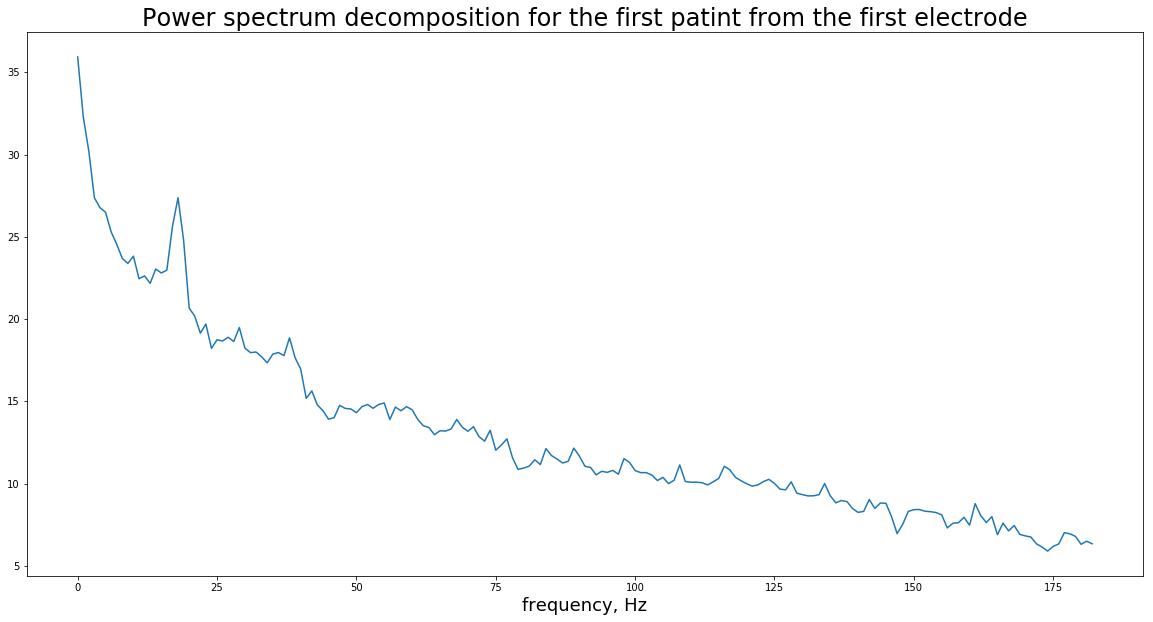

In [8]:
yaxis = data_c[0][0]
xaxis = np.arange(0, len(data_c[0][0]))
plt.figure(figsize=(20,10))
plt.plot(xaxis, yaxis)
plt.xlabel('frequency, Hz', fontsize=18)
plt.title('Power spectrum decomposition for the first patint from the first electrode', fontsize=24)
plt.show()

In [9]:
data_avg = np.mean(data_c[0][:], axis = 0)

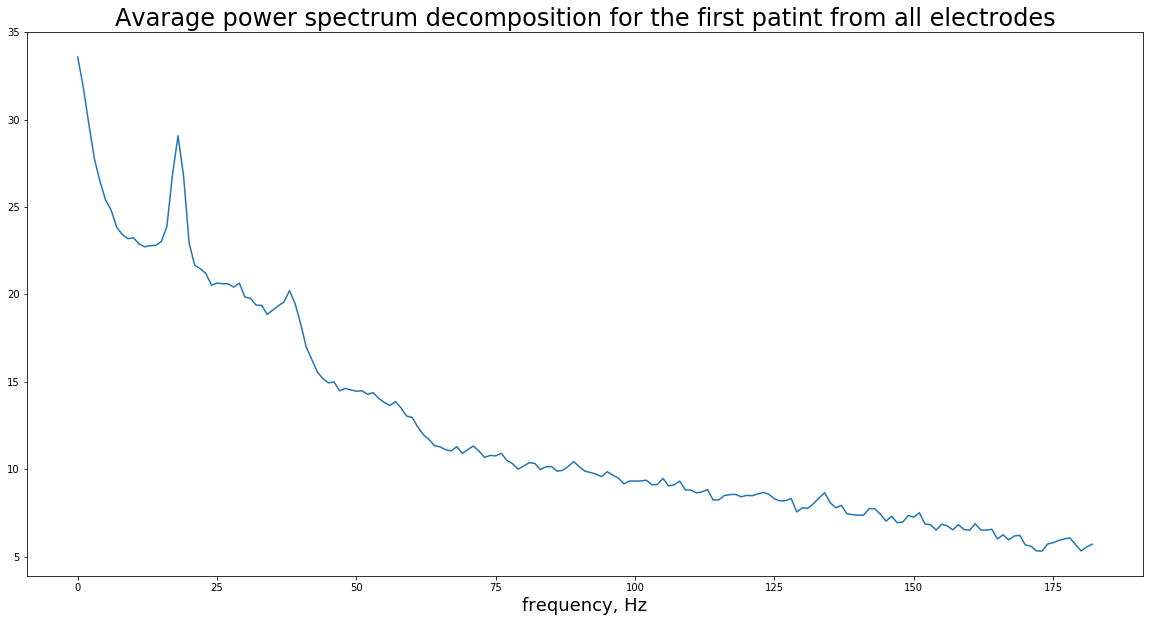

In [10]:
yaxis = data_avg 
xaxis = np.arange(0, len(data_avg ))
plt.figure(figsize=(20,10))
plt.plot(xaxis, yaxis)
plt.xlabel('frequency, Hz', fontsize=18)
plt.title('Avarage power spectrum decomposition for the first patint from all electrodes', fontsize=24)
plt.show()

In [11]:
COLUMN_NAMES=np.arange(183)
df = pd.DataFrame(columns=COLUMN_NAMES)
for i in range(len(data_c)):
    df.loc[i] = (np.mean(data_c[i][:], axis = 0))

In [12]:
x = StandardScaler().fit_transform(df)

2 dataset!

* 1st: df (initial data, avarage from 32 electrodes)

* 2nd: x (standartised data)

In [14]:
pca_model_f = PCA(n_components=2, svd_solver = 'full')
pca_model_f.fit(df)
print(pca_model_f.explained_variance_ratio_)  
pca_transformed_f = pd.DataFrame(data = pca_model_f.transform(df)
             , columns = ['principal component 1', 'principal component 2'])
pca_transformed_f.shape

[ 0.64755693  0.18590005]


Explained variance is really important measure for understanding the lost amount of data after transforming high dimensional dataset to 2 dimensions for example.

In [16]:
pca_model_f = PCA(n_components=2, svd_solver = 'full')
pca_model_f.fit(x)
print(pca_model_f.explained_variance_ratio_)  
pca_transformed_f = pd.DataFrame(data = pca_model_f.transform(x)
             , columns = ['principal component 1', 'principal component 2'])
pca_transformed_f.shape

[ 0.68593312  0.16483627]


(289, 2)

As we can notice from the results above, data normalization is redundant for our dataset

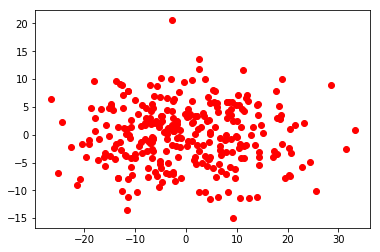

In [17]:
plt.plot(pca_transformed_f['principal component 1'], pca_transformed_f['principal component 2'], 'ro')
plt.show()

In [25]:
COLUMN_NAMES=np.arange(183)
df = pd.DataFrame(columns=COLUMN_NAMES)
for i in range(len(data_c)):
    df.loc[i] = (np.mean(data_c[i][:], axis = 0))

In [26]:
x = pd.DataFrame(x, columns = list(df))

Pefrorming t-SNE

In [27]:
from sklearn.manifold import TSNE

n_sne = 7000
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 289 samples in 0.006s...
[t-SNE] Computed neighbors for 289 samples in 0.073s...
[t-SNE] Computed conditional probabilities for sample 289 / 289
[t-SNE] Mean sigma: 4.606177
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.117535
[t-SNE] Error after 300 iterations: 0.429572


In [28]:
import matplotlib.pyplot as plt

# allows to output plots in the notebook
%matplotlib inline 

# makes inline plots to have better quality (can replace svg with retina as well)
%config InlineBackend.figure_format = 'svg'

# can change the default style of plots - google for more choices
plt.style.use("ggplot")

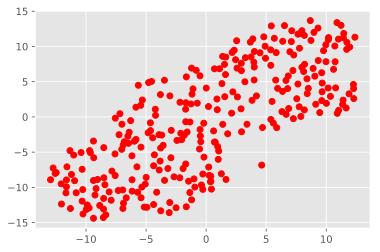

In [29]:
df_tsne = pd.DataFrame()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

plt.plot(df_tsne['x-tsne'], df_tsne['y-tsne'], 'ro')
plt.show()

In [31]:
classes = pd.read_csv("classes.csv", header=None)
classes.columns = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuriticism']
df_class = pd.concat([df, classes], axis = 1)
x_class = pd.concat([x, classes], axis = 1)

In [31]:
pca_n = IncrementalPCA(n_components=2, batch_size=3)
pca_n.fit(x_class)
pca_data = pd.DataFrame(data = pca_n.transform(x_class)
             , columns = ['principal component 1', 'principal component 2'])
pca_data = pd.concat([pca_data, classes], axis = 1)
pca_data.head()

Text(0.5,1,'Principal component analysis')

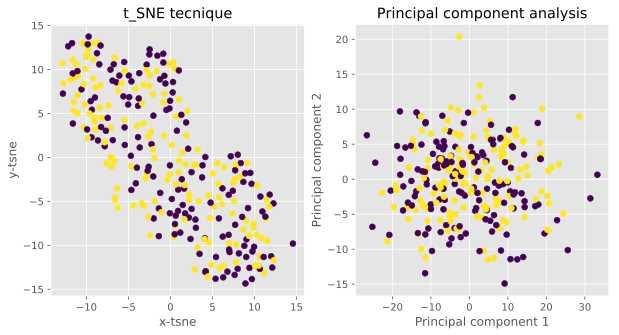

In [38]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title('t_SNE tecnique')
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=x_class['Openness'])
plt.subplot(122)
plt.scatter(pca_data['principal component 1'], pca_data['principal component 2'], c=x_class['Openness'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Principal component analysis')

Text(0.5,1,'Principal component analysis')

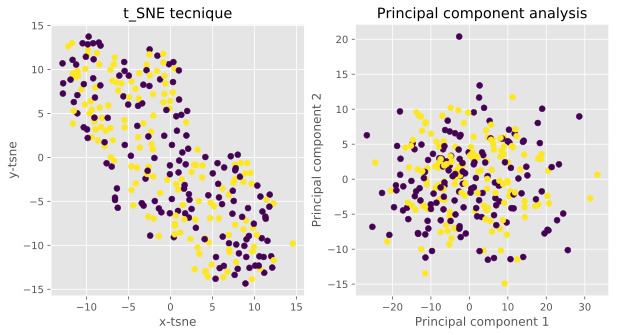

In [39]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title('t_SNE tecnique')
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=x_class['Conscientiousness'])
plt.subplot(122)
plt.scatter(pca_data['principal component 1'], pca_data['principal component 2'], c=x_class['Conscientiousness'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Principal component analysis')

Text(0.5,1,'Principal component analysis')

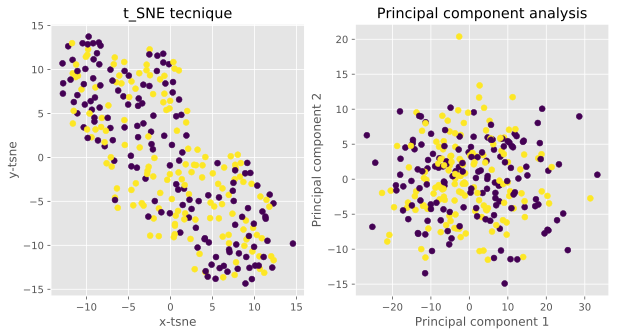

In [40]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title('t_SNE tecnique')
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=x_class['Extraversion'])
plt.subplot(122)
plt.scatter(pca_data['principal component 1'], pca_data['principal component 2'], c=x_class['Extraversion'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Principal component analysis')

Text(0.5,1,'Principal component analysis')

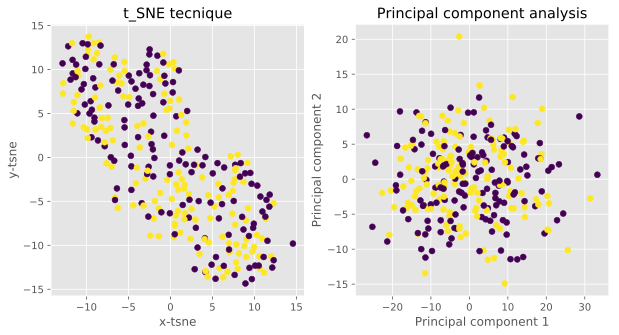

In [41]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title('t_SNE tecnique')
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=x_class['Agreeableness'])
plt.subplot(122)
plt.scatter(pca_data['principal component 1'], pca_data['principal component 2'], c=x_class['Agreeableness'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Principal component analysis')

Text(0.5,1,'Principal component analysis')

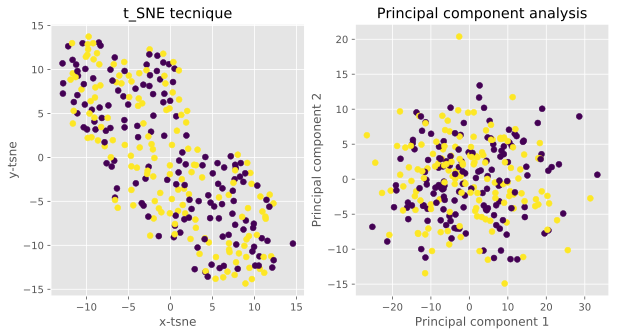

In [37]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title('t_SNE tecnique')
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=x_class['Neuriticism'])
plt.subplot(122)
plt.scatter(pca_data['principal component 1'], pca_data['principal component 2'], c=x_class['Neuriticism'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Principal component analysis')